# Introduction to Data Science - Exercise 2

***
### Darrel Tristan U. Virtusio - 2016144178
### DS100-1 / A11

***
### COVID-19 Global Dataset hyperlinks: 

<a href="https://datahub.io/core/covid-19#data">Main website for the COVID-19 Global Dataset</a>

***

## Main Program
***

### Importing necessary libraries

In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading the dataset and cleaning the dataset

In [2]:
data = pd.read_csv('countries-aggregated_csv.csv')

In [17]:
peru_data = data[data.Country == "Peru"]

peru_june_data = peru_data.iloc[161:92]

peru_june_data.head()

,Date,Country,Confirmed,Recovered,Deaths


### Setting the font size for tick label and axis label

In [4]:
AXIS = 8
LABEL = 12

plt.rc('xtick', labelsize=AXIS)
plt.rc('ytick', labelsize=AXIS)
plt.rc('axes', labelsize=LABEL)

### Plotting the Coronavirus Cases, Recoveries, and Deaths 

<IPython.core.display.Javascript object>


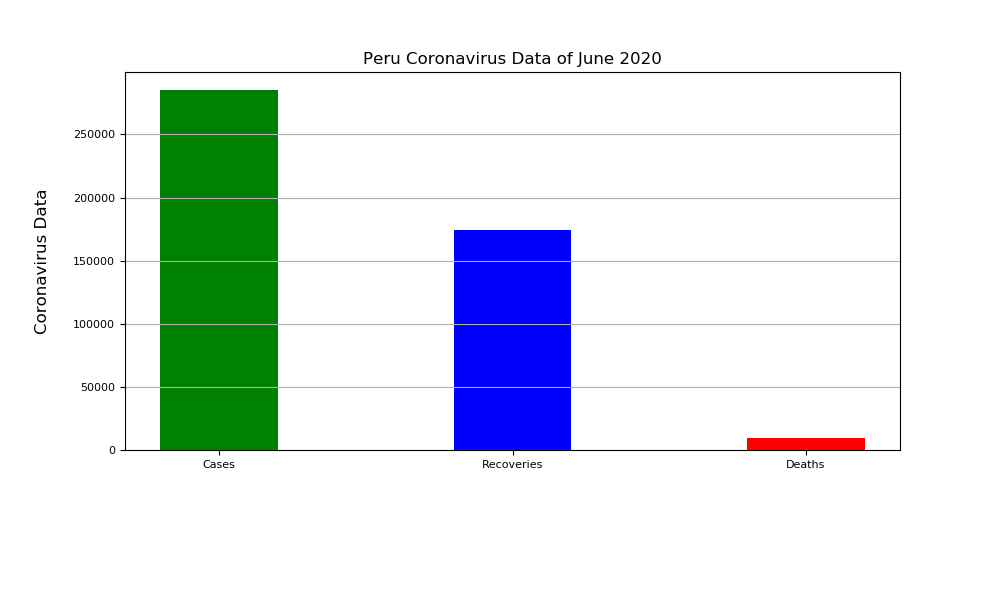

In [5]:
fig = plt.figure(figsize=(10,6))

plt.bar('Cases', peru_june_data.Confirmed, color='green', width = 0.40, label = 'Cases')
plt.bar('Recoveries', peru_june_data.Recovered, color='blue', width = 0.40, label = 'Recoveries')
plt.bar('Deaths', peru_june_data.Deaths, color='red', width=0.40, label = 'Deaths')
ax = plt.gca()
ax.yaxis.grid()
ax.set_ylabel('Coronavirus Data\n')
ax.set_title("Peru Coronavirus Data of June 2020")
plt.subplots_adjust(bottom=0.25)

plt.show()

### Discussion of Coronavirus Data of Peru

- __Cases__

    The confirmed cases of coronavirus in Peru is the green bar graph on the left side. At the start of the month, the confirmed cases is 170,039. As time goes by, the confirmed cases goes up. By the end of the month, the confirmed cases is 285,213. In global ranking, Peru is in the top countries that has a lot of coronavirus cases.
    
    
- __Recoveries__

    The recoveries data of coronavirus is the blue bar graph on the center. The recovered cases from the start of the month is 68,507. The recoveries grows steadily but it is still less than the confirmed cases. However, it is still significant that the rate of recoveries is higher than mortalities. By the end of the month, the confirmed recoveries is 174,535.
    
    
- __Deaths__

    The deaths data of coronavirus is the red bar graph on the right side. It is good news that the rate of mortality is low, however it is still need to be lower. The deaths from the start of the month is only at 4,634. But by the end of the month, the deaths due to covid is 9,677. The cases for deaths the whole month increased by at least 5,000.

### 3-day Moving Average for the month of June

In [15]:
peru_confirmed = peru_june_data['Confirmed'].tolist()
peru_death = peru_june_data['Deaths'].tolist()
peru_recovered = peru_june_data['Recovered'].tolist()

# using the repeat and convolve function of numpy to compute for 3-day moving average
def movingAverage(value):
    weights = np.repeat(1.0, 3)/3
    smas = np.convolve(value, weights, 'valid')
    return smas

smas_confirmed = movingAverage(peru_confirmed)
smas_death = movingAverage(peru_death)
smas_recovered = movingAverage(peru_recovered)

### Plotting the 3-Day Moving Average of Cases, Recoveries, and Deaths

<IPython.core.display.Javascript object>


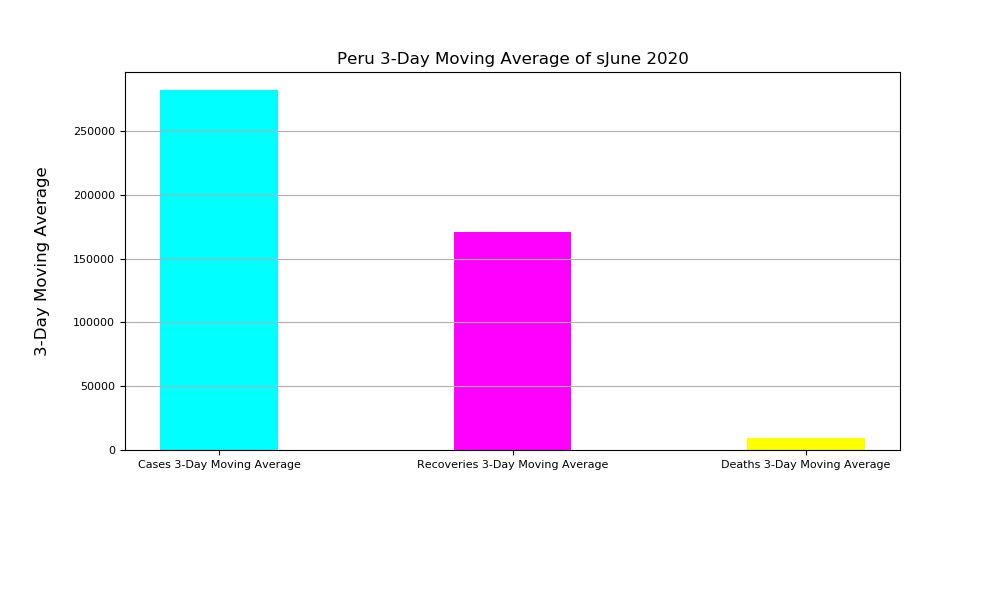

In [16]:
fig = plt.figure(figsize=(10,6))

plt.bar('Cases 3-Day Moving Average', smas_confirmed, color='cyan', width = 0.40)
plt.bar('Recoveries 3-Day Moving Average', smas_recovered, color='magenta', width = 0.40)
plt.bar('Deaths 3-Day Moving Average', smas_death, color='yellow', width=0.40)
ax = plt.gca()
ax.yaxis.grid()
ax.set_ylabel('3-Day Moving Average\n')
ax.set_title("Peru 3-Day Moving Average of sJune 2020")
plt.subplots_adjust(bottom=0.25)

plt.show()

### Discussion of the 3-Day Moving Averages

- __Computation of the 3-Day Moving Average__
<br>
<br>
    The formula used for computing the 3-Day Moving Average is: <br><br>
            $ 3-Day Moving Average = (A1 + A2 + ... + An)/n $
        
   
        where:
        An = Coronavirus data at day n
        n = total number of days
        

- __3-Day Moving Average of Confirmed Cases__

    Using the formula above, the 3-day moving average for confirmed cases is computed. From day 1 to day 3 (June 1 - 3), the computed average is 175,706. The 3-day moving average is increasing as day goes. For the last 3-day moving average (June 28 - 30), the computed average is already at 282,332.33 which is at least 110,000 greater since the start of the month.
    
    
- __3-Day Moving Average of Recoveries__

    Using the formula above, the 3-day moving average for recoveries is computed. The 3-day moving average for recoveries is lower than the confirmed cases but is significantly higher than deaths. From day 1 to day 3 (June 1 - 3), the computed average for recoveries is 70,027.67. By the end of the month, the computed average is 171,230.67. 
    
    
- __3-Day Moving Average of Deaths__

    Using the formula above, the 3-day moving average for deaths is computed. The 3-day moving average for deaths is very low which means there are not a lot of mortalities compared to recoveries. The 3-day moving average from this month did not exceed 10,000. From day 1 to day 3 (June 1 - 3), the computed average for death is only at 4,765. And from the last average (June 28 - June 30), the computed average is 9499.33.

***